# * TP4 – Linear and Multivariable Regression

In this PW, we will :
- Use linear regression to predict a continuous variable
- Implement the algorithm
- Calculate the coefficients with the least squares method
- Evaluate the performances with R², MSE, RMSE, MAE

In [170]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# PART 1 : DATA EXPLORATION
# ==============================================================================

In [171]:
# Loading training data
df = pd.read_csv("/kaggle/input/holistic-health-and-lifestyle-score-dataset/holistic_health_lifestyle_dataset.csv")

# Preview the data
df.head()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,Poor
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,Average
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,Good
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,Good
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,Good


In [172]:
print(f"The data has {df.shape[0]} lines and {df.shape[1]} columns")
for col in df.columns:
    print(f"column {col} values :",len(df[col].unique()))
print(df["Health_Status"].unique())

The data has 10000 lines and 11 columns
column Physical_Activity values : 9888
column Nutrition_Score values : 9300
column Stress_Level values : 9741
column Mindfulness values : 9329
column Sleep_Hours values : 9751
column Hydration values : 9919
column BMI values : 9595
column Alcohol values : 7727
column Smoking values : 8005
column Overall_Health_Score values : 7761
column Health_Status values : 3
['Poor' 'Average' 'Good']


In [173]:
# Check info and missing values
df = df.drop(columns=["Health_Status"]) # we don't need the health_status cause it's just a reflection of the Overall_Health_Score
print(df.info())
print(df.isna().sum()) # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Physical_Activity     10000 non-null  float64
 1   Nutrition_Score       10000 non-null  float64
 2   Stress_Level          10000 non-null  float64
 3   Mindfulness           10000 non-null  float64
 4   Sleep_Hours           10000 non-null  float64
 5   Hydration             10000 non-null  float64
 6   BMI                   10000 non-null  float64
 7   Alcohol               10000 non-null  float64
 8   Smoking               10000 non-null  float64
 9   Overall_Health_Score  10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB
None
Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 

In [174]:
# check columns correlation
df.corr()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score
Physical_Activity,1.000000,-0.008942,0.023377,-0.011513,-0.009958,-0.021959,-0.016279,-0.021592,0.004774,0.146014
Nutrition_Score,-0.008942,1.000000,0.027171,0.014820,-0.003984,0.000604,-0.009665,0.001983,-0.003347,0.385678
Stress_Level,0.023377,0.027171,1.000000,0.001435,0.008659,-0.004224,-0.000406,-0.013165,-0.001170,-0.129315
Mindfulness,-0.011513,0.014820,0.001435,1.000000,0.008517,-0.008026,0.014029,0.017807,0.005669,0.715856
Sleep_Hours,-0.009958,-0.003984,0.008659,0.008517,1.000000,-0.010928,0.008973,0.002004,0.001971,0.171856
Hydration,-0.021959,0.000604,-0.004224,-0.008026,-0.010928,1.000000,-0.002795,0.013731,0.013585,0.142044
BMI,-0.016279,-0.009665,-0.000406,0.014029,0.008973,-0.002795,1.000000,0.005597,-0.001867,-0.160278
Alcohol,-0.021592,0.001983,-0.013165,0.017807,0.002004,0.013731,0.005597,1.000000,-0.023092,-0.174725
Smoking,0.004774,-0.003347,-0.001170,0.005669,0.001971,0.013585,-0.001867,-0.023092,1.000000,-0.294431
Overall_Health_Score,0.146014,0.385678,-0.129315,0.715856,0.171856,0.142044,-0.160278,-0.174725,-0.294431,1.000000


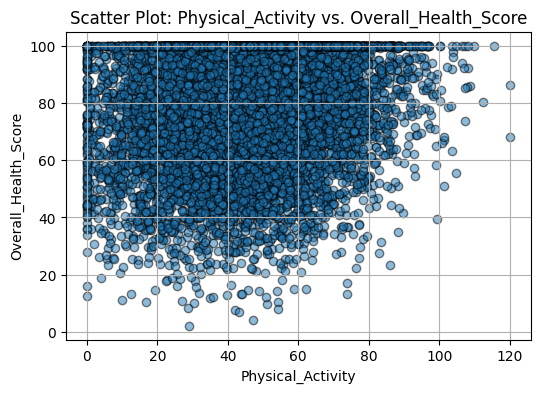

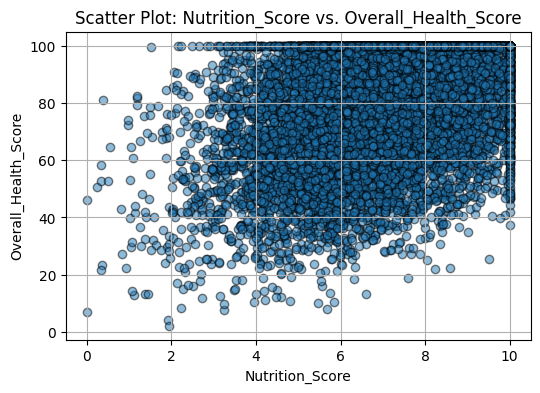

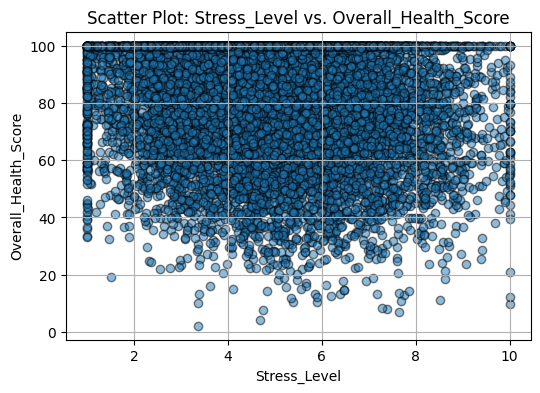

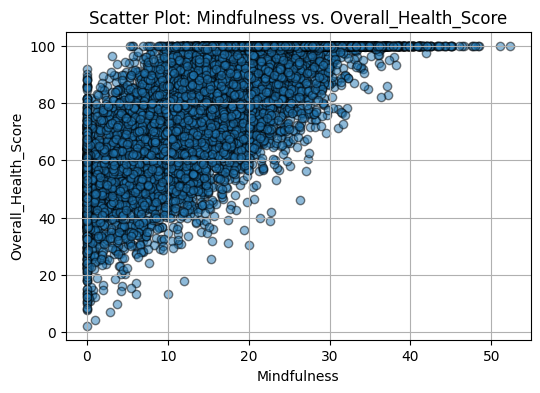

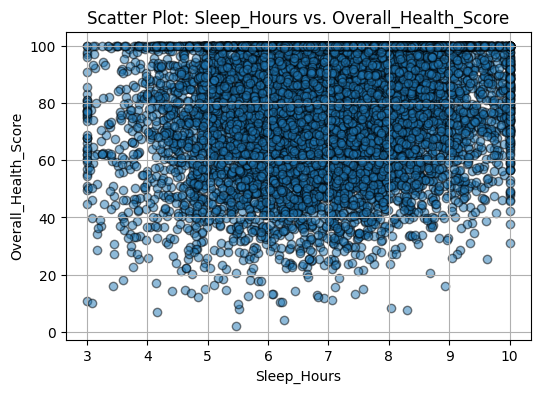

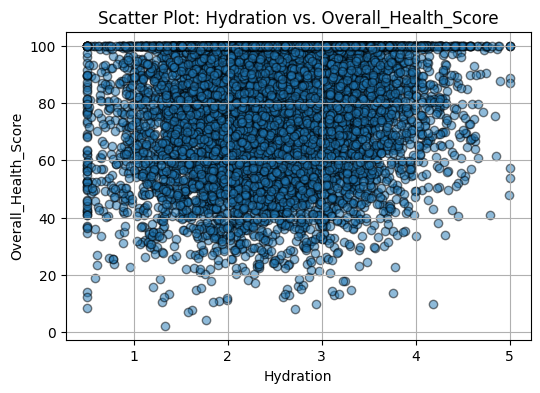

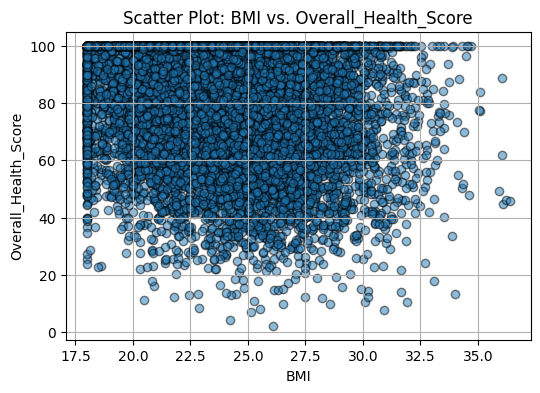

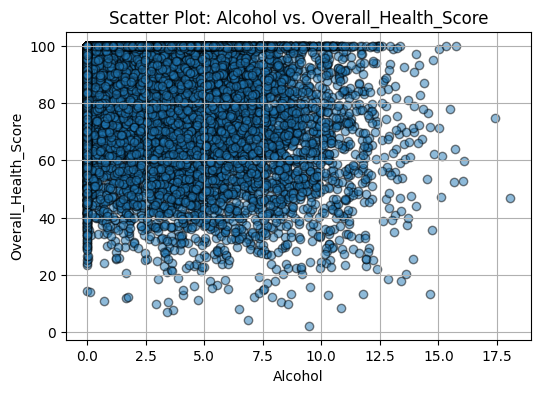

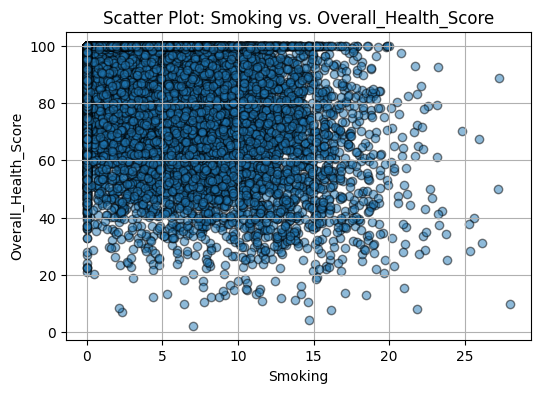

In [175]:
# Create scatter plots
for col in df.columns:
    if col == "Overall_Health_Score":
        continue
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df["Overall_Health_Score"], alpha=0.5, edgecolors='k')  # Scatter plot
    plt.title(f'Scatter Plot: {col} vs. Overall_Health_Score')
    plt.xlabel(col)
    plt.ylabel("Overall_Health_Score")
    plt.grid(True)  # Add grid for readability
    plt.show()

# ==============================================================================
# PART 2 : PREPROCESSING
# ==============================================================================

In [176]:
from sklearn.preprocessing import StandardScaler


# Separate features and target
X = df.drop(columns=["Overall_Health_Score"])
y = df["Overall_Health_Score"]

# scale non binary numerical columns if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.column_stack([X_scaled])
X = pd.DataFrame(X_scaled, columns=[X.columns])

# display the results
X.head()

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking
0,0.498552,-0.702840,0.366014,-1.610320,-0.482109,0.093889,0.053880,0.231438,0.655418
1,-0.141810,-0.306711,0.298976,-1.139625,1.034289,-0.068098,0.558635,1.204109,-0.496720
2,0.650806,-0.616695,-0.959828,-0.644664,-0.202569,0.945748,0.327357,-1.077368,-0.221285
3,1.533568,0.135003,0.604699,0.134546,0.092379,1.525615,-1.360879,1.967443,-0.351840
4,-0.238512,1.289165,-1.531071,1.059503,0.732644,0.681340,-0.222511,0.243588,0.475481


In [177]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (8000, 9) Test: (2000, 9)


# ==============================================================================
# PART 3 : REGRESSION IMPLEMENTATION
# ==============================================================================

In [ ]:
from sklearn.linear_model import LinearRegression

class MultipleLinearRegression:
    """
    manual implementaion of linear regression multivariable.

    model : y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

    least squares method :
    β = (X^T X)^(-1) X^T y
    """

    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.n_features = None

    def fit(self, X, y):
        """
        Model training by the least squares method

        Args:
            X : features matrix (n_samples, n_features)
            y : target vector (n_samples,)
        """
        # Conversion into a numpy array
        X = np.array(X)
        y = np.array(y)

        self.n_features = X.shape[1]

        # Adding one column for the intercept
        X_with_intercept = np.column_stack([np.ones(len(X)), X])

        # calculating the  coefficients : β = (X^T X)^(-1) X^T y
        # Method 1 : matrix inversion (could be unstable)
        # XtX = X_with_intercept.T @ X_with_intercept
        # Xty = X_with_intercept.T @ y
        # beta = np.linalg.inv(XtX) @ Xty

        # Method 2 : Direct system resolution (plus stable)
        XtX = X_with_intercept.T @ X_with_intercept
        Xty = X_with_intercept.T @ y

        # Ajout d'un terme de régularisation pour stabilité numérique
        ridge_penalty = 1e-6
        XtX_reg = XtX + ridge_penalty * np.eye(XtX.shape[0])

        beta = np.linalg.solve(XtX_reg, Xty)

        # separating intercept and coefficients
        self.intercept = beta[0]
        self.coefficients = beta[1:]

        print(f"   Model trained with success !")
        print(f"   Intercept (β₀) : {self.intercept:.6f}")
        print(f"   number de coefficients : {len(self.coefficients)}")
        print(f"   coefficients : {self.coefficients}")

    def predict(self, X):
        """
        Predicting the target values

        Args:
            X : features matrix

        Returns:
            predictions (array)
        """
        X = np.array(X)
        return self.intercept + X @ self.coefficients

    def get_coefficients(self):
        """return model coefficiants"""
        return {"intercept": self.intercept, "coefficients": self.coefficients}


# sklearn linear regression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
print("Library model:")
print(f"Intercept : {sk_model.intercept_}")
print(f"Coefficiants : {sk_model.coef_}")
print("#"*40)
print("#"*40)
print("#"*40)

# manual model linear regression
print("\n training the linear regression multivariable model...")
model = MultipleLinearRegression()
model.fit(X_train.values, y_train.values)



Library model:
Intercept : 78.2154630314899
Coefficiants : [ 3.17322628  7.49682665 -2.94606082 14.22918598  3.4487464   3.09009433
 -3.24956111 -3.84975651 -6.0499545 ]
########################################
########################################
########################################

🔧 training the linear regression multivariable model...
   Model trained with success !
   Intercept (β₀) : 78.215463
   number de coefficients : 9
   coefficients : [ 3.17322628  7.49682665 -2.94606082 14.22918598  3.4487464   3.09009433
 -3.24956111 -3.84975651 -6.0499545 ]


# ==============================================================================
# PART 4 : EVALUATION
# ==============================================================================

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Unified evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results = pd.DataFrame([[mae, mse, rmse, r2]], columns=["MAE", "MSE", "RMSE", "R2"])
    return results

evaluate_model(y_test, y_pred)

,MAE,MSE,RMSE,R2
0,4.401208,37.703298,6.140301,0.899259
